In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("nasa_processed.csv")
df.head()

engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  \
0          1      1       -0.0007       -0.0004         100.0   
1          1      2        0.0019       -0.0003         100.0   
2          1      3       -0.0043        0.0003         100.0   
3          1      4        0.0007        0.0000         100.0   
4          1      5       -0.0019       -0.0002         100.0   

   sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                641.82               1589.70               1400.60   
1                642.15               1591.82               1403.14   
2                642.35               1587.99               1404.20   
3                642.35               1582.79               1401.87   
4                642.37               1582.85               1406.22   

   sensor_measurement_6  sensor_measurement_7  ...  sensor_measurement_18  \
0                 21.61                554.36  ...                   2388   
1                 21.61                553.75  ...                   2388   
2                 21.61                554.26  ...                   2388   
3                 21.61                554.45  ...                   2388   
4                 21.61                554.00  ...                   2388   

   sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  RUL  \
0                  100.0                  39.06                23.4190  191   
1                  100.0                  39.00                23.4236  190   
2                  100.0                  38.95                23.3442  189   
3                  100.0                  38.88                23.3739  188   
4                  100.0                  38.90                23.4044  187   

   sensor_measurement_2_ma  sensor_measurement_2_ema  \
0               641.820000                641.820000   
1               641.985000                641.930000   
2               642.106667                642.070000   
3               642.167500                642.163333   
4               642.208000                642.232222   

   sensor_measurement_2_diff  sensor_measurement_2_z  anomaly  
0                        NaN               -1.721725        0  
1                       0.33               -1.061780        0  
2                       0.20               -0.661813        0  
3                       0.00               -0.661813        0  
4                       0.02               -0.621816        0  

[5 rows x 29 columns]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, classification_report
)

# Show all columns for debugging
pd.set_option('display.max_columns', None)

# Check if your DataFrame is already in memory or load it if needed
# If it's already in memory from another notebook, skip this
# df = pd.read_csv("your_cleaned_dataset.csv")  # Optional

df.head()


engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  \
0          1      1       -0.0007       -0.0004         100.0   
1          1      2        0.0019       -0.0003         100.0   
2          1      3       -0.0043        0.0003         100.0   
3          1      4        0.0007        0.0000         100.0   
4          1      5       -0.0019       -0.0002         100.0   

   sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                641.82               1589.70               1400.60   
1                642.15               1591.82               1403.14   
2                642.35               1587.99               1404.20   
3                642.35               1582.79               1401.87   
4                642.37               1582.85               1406.22   

   sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  \
0                 21.61                554.36               2388.06   
1                 21.61                553.75               2388.04   
2                 21.61                554.26               2388.08   
3                 21.61                554.45               2388.11   
4                 21.61                554.00               2388.06   

   sensor_measurement_9  sensor_measurement_11  sensor_measurement_12  \
0               9046.19                  47.47                 521.66   
1               9044.07                  47.49                 522.28   
2               9052.94                  47.27                 522.42   
3               9049.48                  47.13                 522.86   
4               9055.15                  47.28                 522.19   

   sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
0                2388.02                8138.62                 8.4195   
1                2388.07                8131.49                 8.4318   
2                2388.03                8133.23                 8.4178   
3                2388.08                8133.83                 8.3682   
4                2388.04                8133.80                 8.4294   

   sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  \
0                   0.03                    392                   2388   
1                   0.03                    392                   2388   
2                   0.03                    390                   2388   
3                   0.03                    392                   2388   
4                   0.03                    393                   2388   

   sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  RUL  \
0                  100.0                  39.06                23.4190  191   
1                  100.0                  39.00                23.4236  190   
2                  100.0                  38.95                23.3442  189   
3                  100.0                  38.88                23.3739  188   
4                  100.0                  38.90                23.4044  187   

   sensor_measurement_2_ma  sensor_measurement_2_ema  \
0               641.820000                641.820000   
1               641.985000                641.930000   
2               642.106667                642.070000   
3               642.167500                642.163333   
4               642.208000                642.232222   

   sensor_measurement_2_diff  sensor_measurement_2_z  anomaly  
0                        NaN               -1.721725        0  
1                       0.33               -1.061780        0  
2                       0.20               -0.661813        0  
3                       0.00               -0.661813        0  
4                       0.02               -0.621816        0

In [4]:
sensor_cols = [
    'sensor_measurement_2',
    'sensor_measurement_3',
    'sensor_measurement_4',
    'sensor_measurement_7'
]


In [5]:
from sklearn.preprocessing import StandardScaler

# Drop rows with any missing values in selected sensors
df_multi = df.dropna(subset=sensor_cols).copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_multi[sensor_cols])


In [6]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_multi['multi_anomaly'] = iso_forest.fit_predict(X_scaled)

# Convert -1 (anomaly), 1 (normal) to binary: 1 = anomaly
df_multi['multi_anomaly'] = df_multi['multi_anomaly'].map({1: 0, -1: 1})


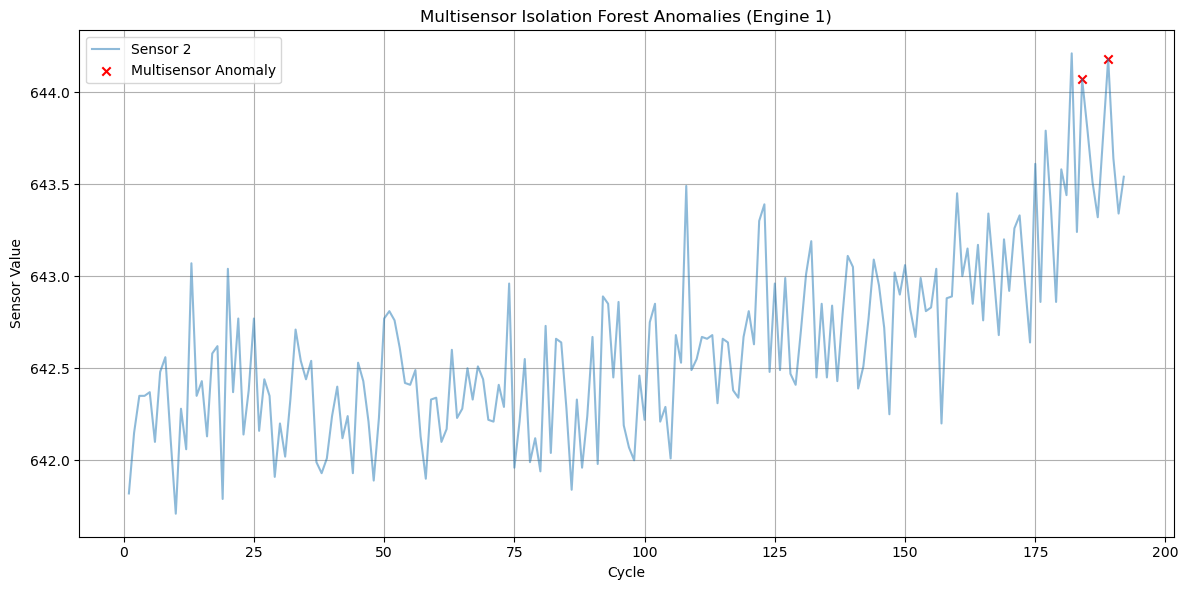

In [7]:
import matplotlib.pyplot as plt

df_unit = df_multi[df_multi['engine_id'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(df_unit['cycle'], df_unit['sensor_measurement_2'], label='Sensor 2', alpha=0.5)
plt.scatter(
    df_unit[df_unit['multi_anomaly'] == 1]['cycle'],
    df_unit[df_unit['multi_anomaly'] == 1]['sensor_measurement_2'],
    color='red', marker='x', label='Multisensor Anomaly'
)
plt.title('Multisensor Isolation Forest Anomalies (Engine 1)')
plt.xlabel('Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
features = [
    'sensor_measurement_2', 'sensor_measurement_2_ma', 'sensor_measurement_2_diff',
    'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7'
]

df_model = df.dropna(subset=features + ['anomaly']).copy()
X = df_model[features]
y = df_model['anomaly']

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)


RandomForestClassifier(random_state=42)

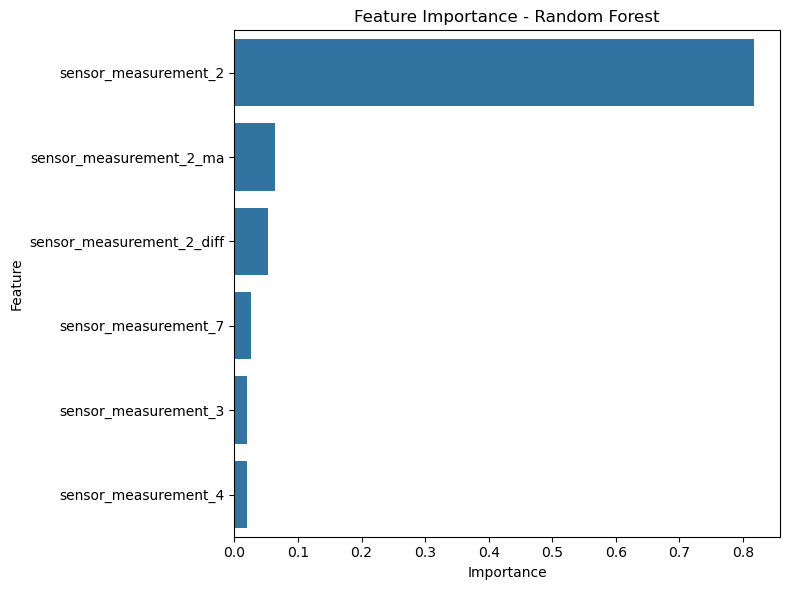

In [9]:
import seaborn as sns

importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


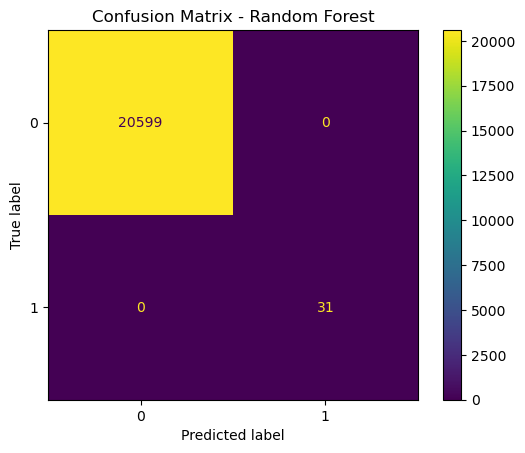

In [10]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)[:, 1]  # probability for class 1

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()


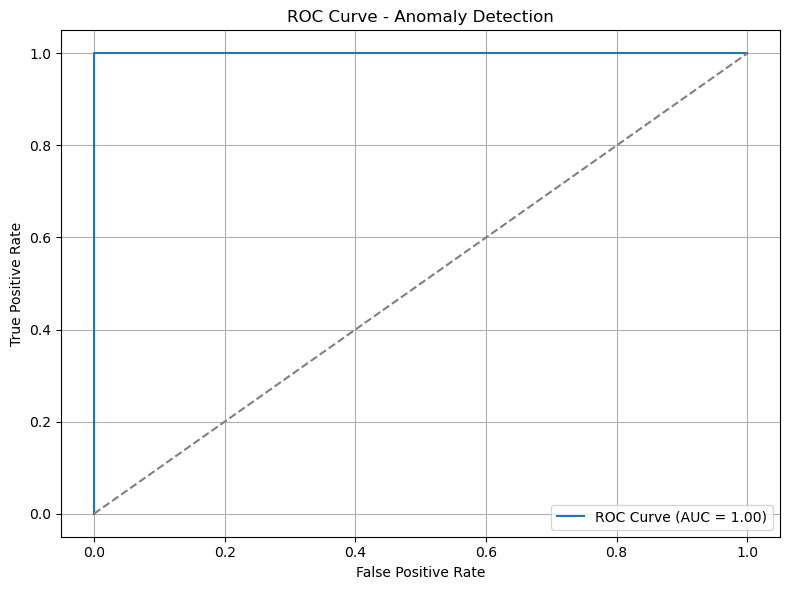

In [11]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Anomaly Detection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
print(df.columns)


Index(['engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3',
       'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
       'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21', 'RUL',
       'sensor_measurement_2_ma', 'sensor_measurement_2_ema',
       'sensor_measurement_2_diff', 'sensor_measurement_2_z', 'anomaly'],
      dtype='object')


In [13]:
X = df.drop("anomaly", axis=1)
y = df["anomaly"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Randomized Search
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_grid,
                               n_iter=50,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fit to training data
rf_random.fit(X_train, y_train)

# Store the best model
best_rf = rf_random.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [16]:
print("Best Parameters:", rf_random.best_params_)
print("Best Score (CV accuracy):", rf_random.best_score_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Best Score (CV accuracy): 1.0


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4121
           1       1.00      1.00      1.00         6

    accuracy                           1.00      4127
   macro avg       1.00      1.00      1.00      4127
weighted avg       1.00      1.00      1.00      4127


Confusion Matrix:
 [[4121    0]
 [   0    6]]


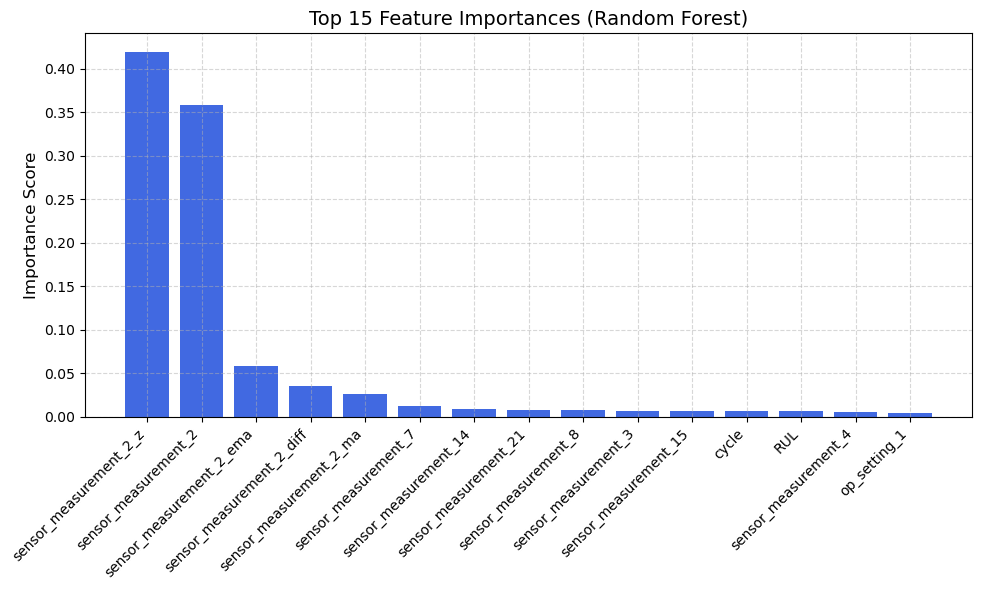

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from best_rf
importances = best_rf.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]
top_n = 15  # Show top 15 features

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.bar(range(top_n), importances[indices][:top_n], align="center", color="royalblue")
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=45, ha="right", fontsize=10)
plt.ylabel("Importance Score", fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [19]:
    !pip install xgboost


In [20]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


In [21]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}


In [22]:
use_label_encoder=False,

In [23]:
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)


In [24]:
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

xgb_random = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)

best_xgb = xgb_random.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [25]:
print("Best XGBoost Parameters:", xgb_random.best_params_)
print("Best CV Accuracy (XGBoost):", xgb_random.best_score_)
                                                                    

Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV Accuracy (XGBoost): 0.9987275481259121


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_xgb = best_xgb.predict(X_test)

print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))


Test Accuracy (XGBoost): 0.9983038526774897

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4121
           1       0.33      0.17      0.22         6

    accuracy                           1.00      4127
   macro avg       0.67      0.58      0.61      4127
weighted avg       1.00      1.00      1.00      4127


Confusion Matrix (XGBoost):
 [[4119    2]
 [   5    1]]


In [27]:
import joblib

# Save Random Forest model
joblib.dump(best_rf, 'random_forest_model.pkl')

# Save XGBoost model
joblib.dump(best_xgb, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [28]:
# Load and predict using saved Random Forest model
loaded_rf = joblib.load('random_forest_model.pkl')
y_loaded_pred = loaded_rf.predict(X_test)

# Confirm it's working
from sklearn.metrics import accuracy_score
print("Loaded RF Accuracy:", accuracy_score(y_test, y_loaded_pred))


Loaded RF Accuracy: 1.0


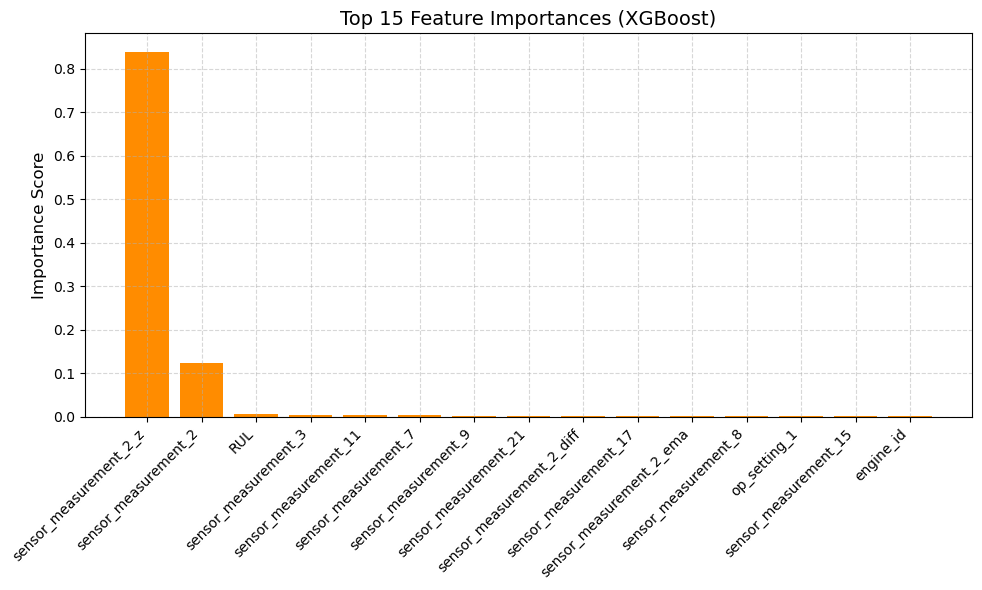

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Get importances from XGBoost
xgb_importances = best_xgb.feature_importances_
features = X.columns
indices = np.argsort(xgb_importances)[::-1]
top_n = 15  # Show top 15 features

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (XGBoost)", fontsize=14)
plt.bar(range(top_n), xgb_importances[indices][:top_n], color='darkorange', align="center")
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=45, ha="right", fontsize=10)
plt.ylabel("Importance Score", fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [30]:
# Save your test data (X_test) to a CSV file
X_test.to_csv("sample_input.csv", index=False)
